

#  Project: House Prices Exploratory Data Analysis 


### Methods of Exploratory Data Analysis 
Exploratory Data Analysis is majorly performed using the following methods:

- Univariate visualization — provides summary statistics for each field in the raw data set
- Bivariate visualization — is performed to find the relationship between each variable in the dataset and the target variable of interest
- Multivariate visualization — is performed to understand interactions between different fields in the dataset
- Dimensionality reduction — helps to understand the fields in the data that account for the most variance between observations and allow for the processing of a reduced volume of data.
Through these methods, the data scientist validates assumptions and identifies patterns that will allow for the understanding of the problem and model selection and validates that the data has been generated in the way it was expected to. So, value distribution of each field is checked, a number of missing values is defined, and the possible ways of replacing them are found.

### Key Concepts of Exploratory Data Analysis

- <b>2 types of Data Analysis</b>
   - Confirmatory Data Analysis
   
   - Exploratory Data Analysis

- <b>4 Objectives of EDA</b>
   - Discover Patterns
   
   - Spot Anomalies
   
   - Frame Hypothesis
   
   - Check Assumptions

- <b>2 methods for exploration</b>
   - Univariate Analysis
   
   - Bivariate Analysis

- <b>Stuff done during EDA</b>
   - Trends
   
   - Distribution
   
   - Mean
   
   - Median
   
   - Outlier
   
   - Spread measurement (SD)
   
   - Correlations
   
   - Hypothesis testing
   
   - Visual Exploration
   

### Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

There are 1460 instances of  training data and 1460 of test data. Total number of attributes equals 81, of which 36 are numerical, 43 are categorical + Id and SalePrice.

Numerical Features: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold


Categorical Features: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType,  MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilitif

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
#!pip install missingno
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

To start exploring the data, I need to start by actually loading in my data. Thanks to the Pandas library, this becomes an easy task: import the package as pd, following the convention, and use the read_csv() function, to which I pass the URL in which the data can be found and a header argument. This last argument is one that I can use to make sure that my data is read in correctly: the first row of your data won’t be interpreted as the column names of your DataFrame.

Alternatively, there are also other arguments that can specify to ensure that the data is read in correctly: I can specify the delimiter to use with the sep or delimiter arguments, the column names to use with names or the column to use as the row labels for the resulting DataFrame with index_col.

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

One of the most elementary steps to do this is by getting a basic description of my data. We can use the describe() function to get various summary statistics that exclude NaN values. 

In [4]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Now that we have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, we can easily check out the first and last lines of the DataFrame, respectively.

Let us look at some sample data:

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [7]:
train.shape , test.shape

((1460, 81), (1459, 80))

Let us examine numerical features in the train dataset

In [8]:
numeric_features = train.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Let us examine categorical features in the train dataset

In [9]:
categorical_features = train.select_dtypes(include=[object])

categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Visualising missing values for a sample of 250 

<Axes: >

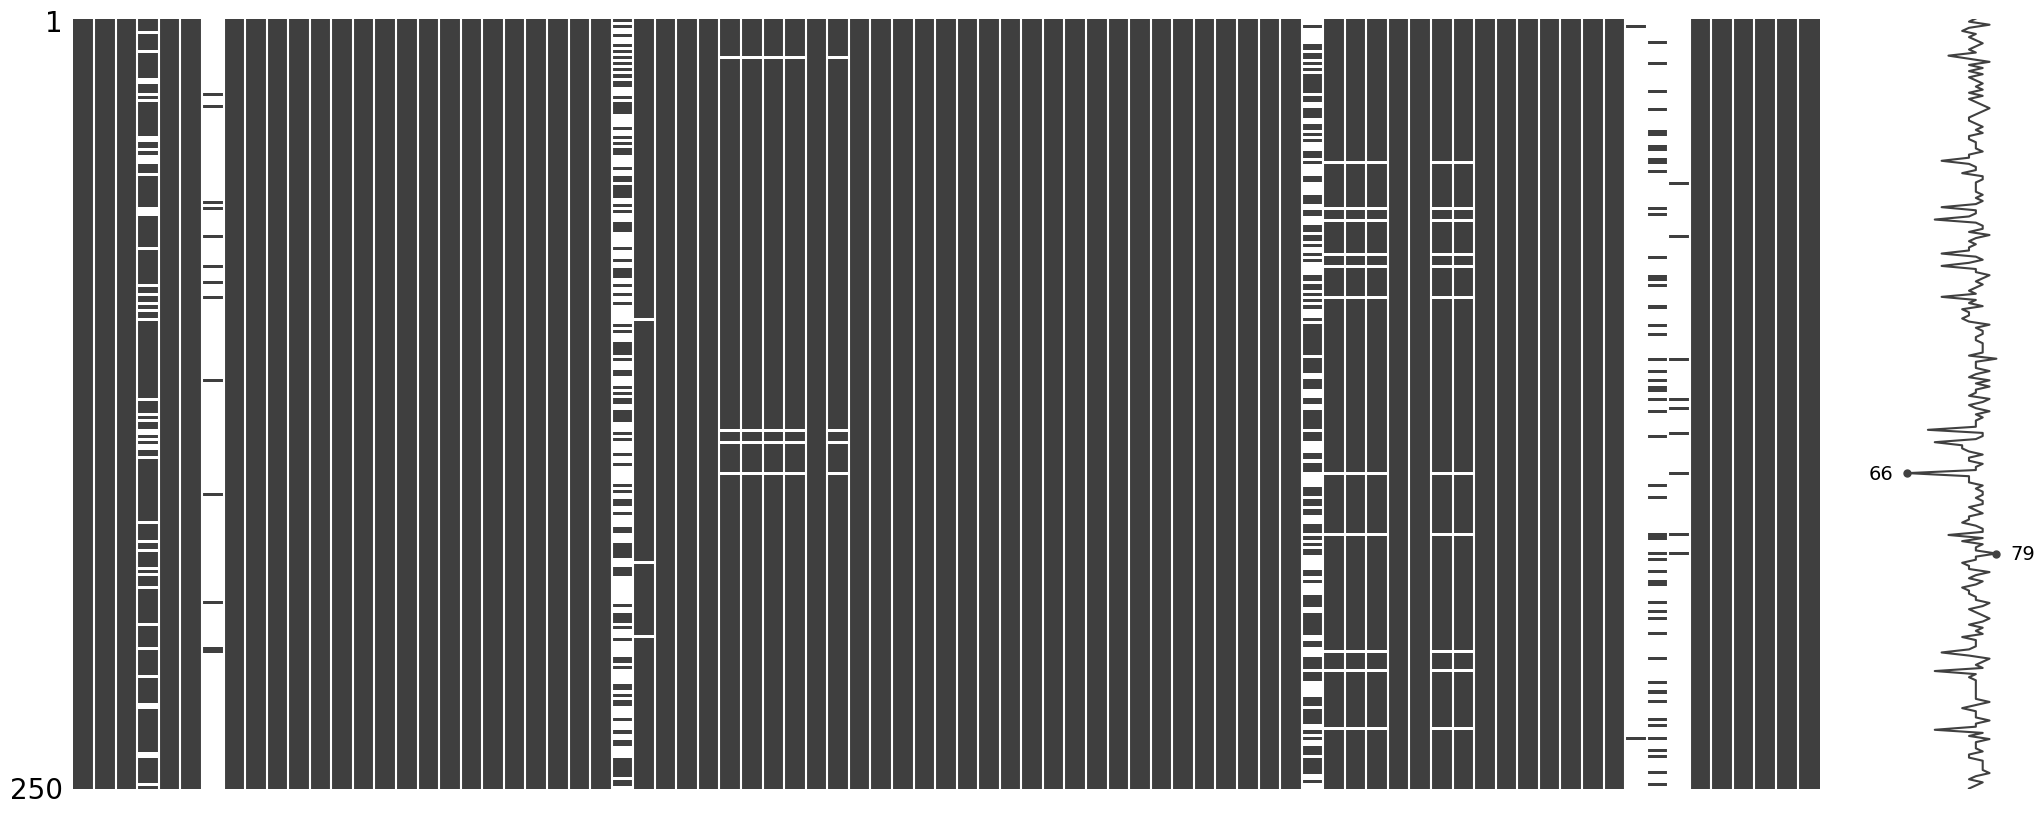

In [10]:
msno.matrix(train.sample(250))

#### Heatmap

The **missingno** correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

<Axes: >

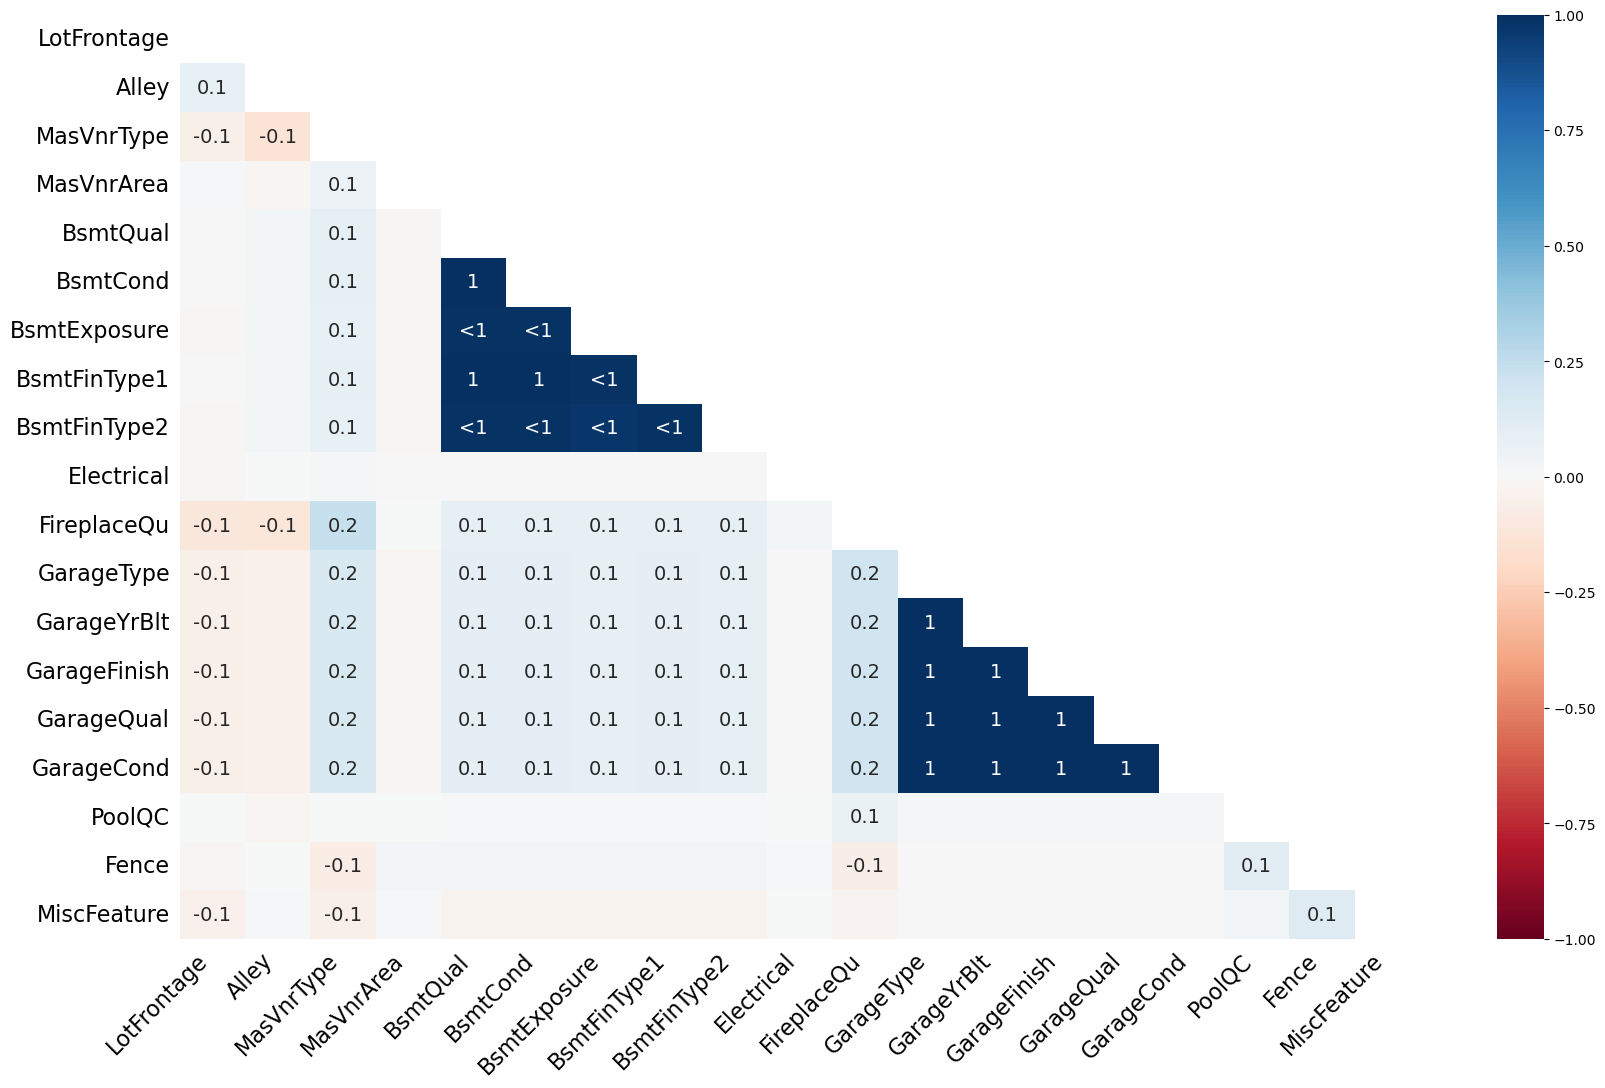

In [11]:
msno.heatmap(train)

<Axes: >

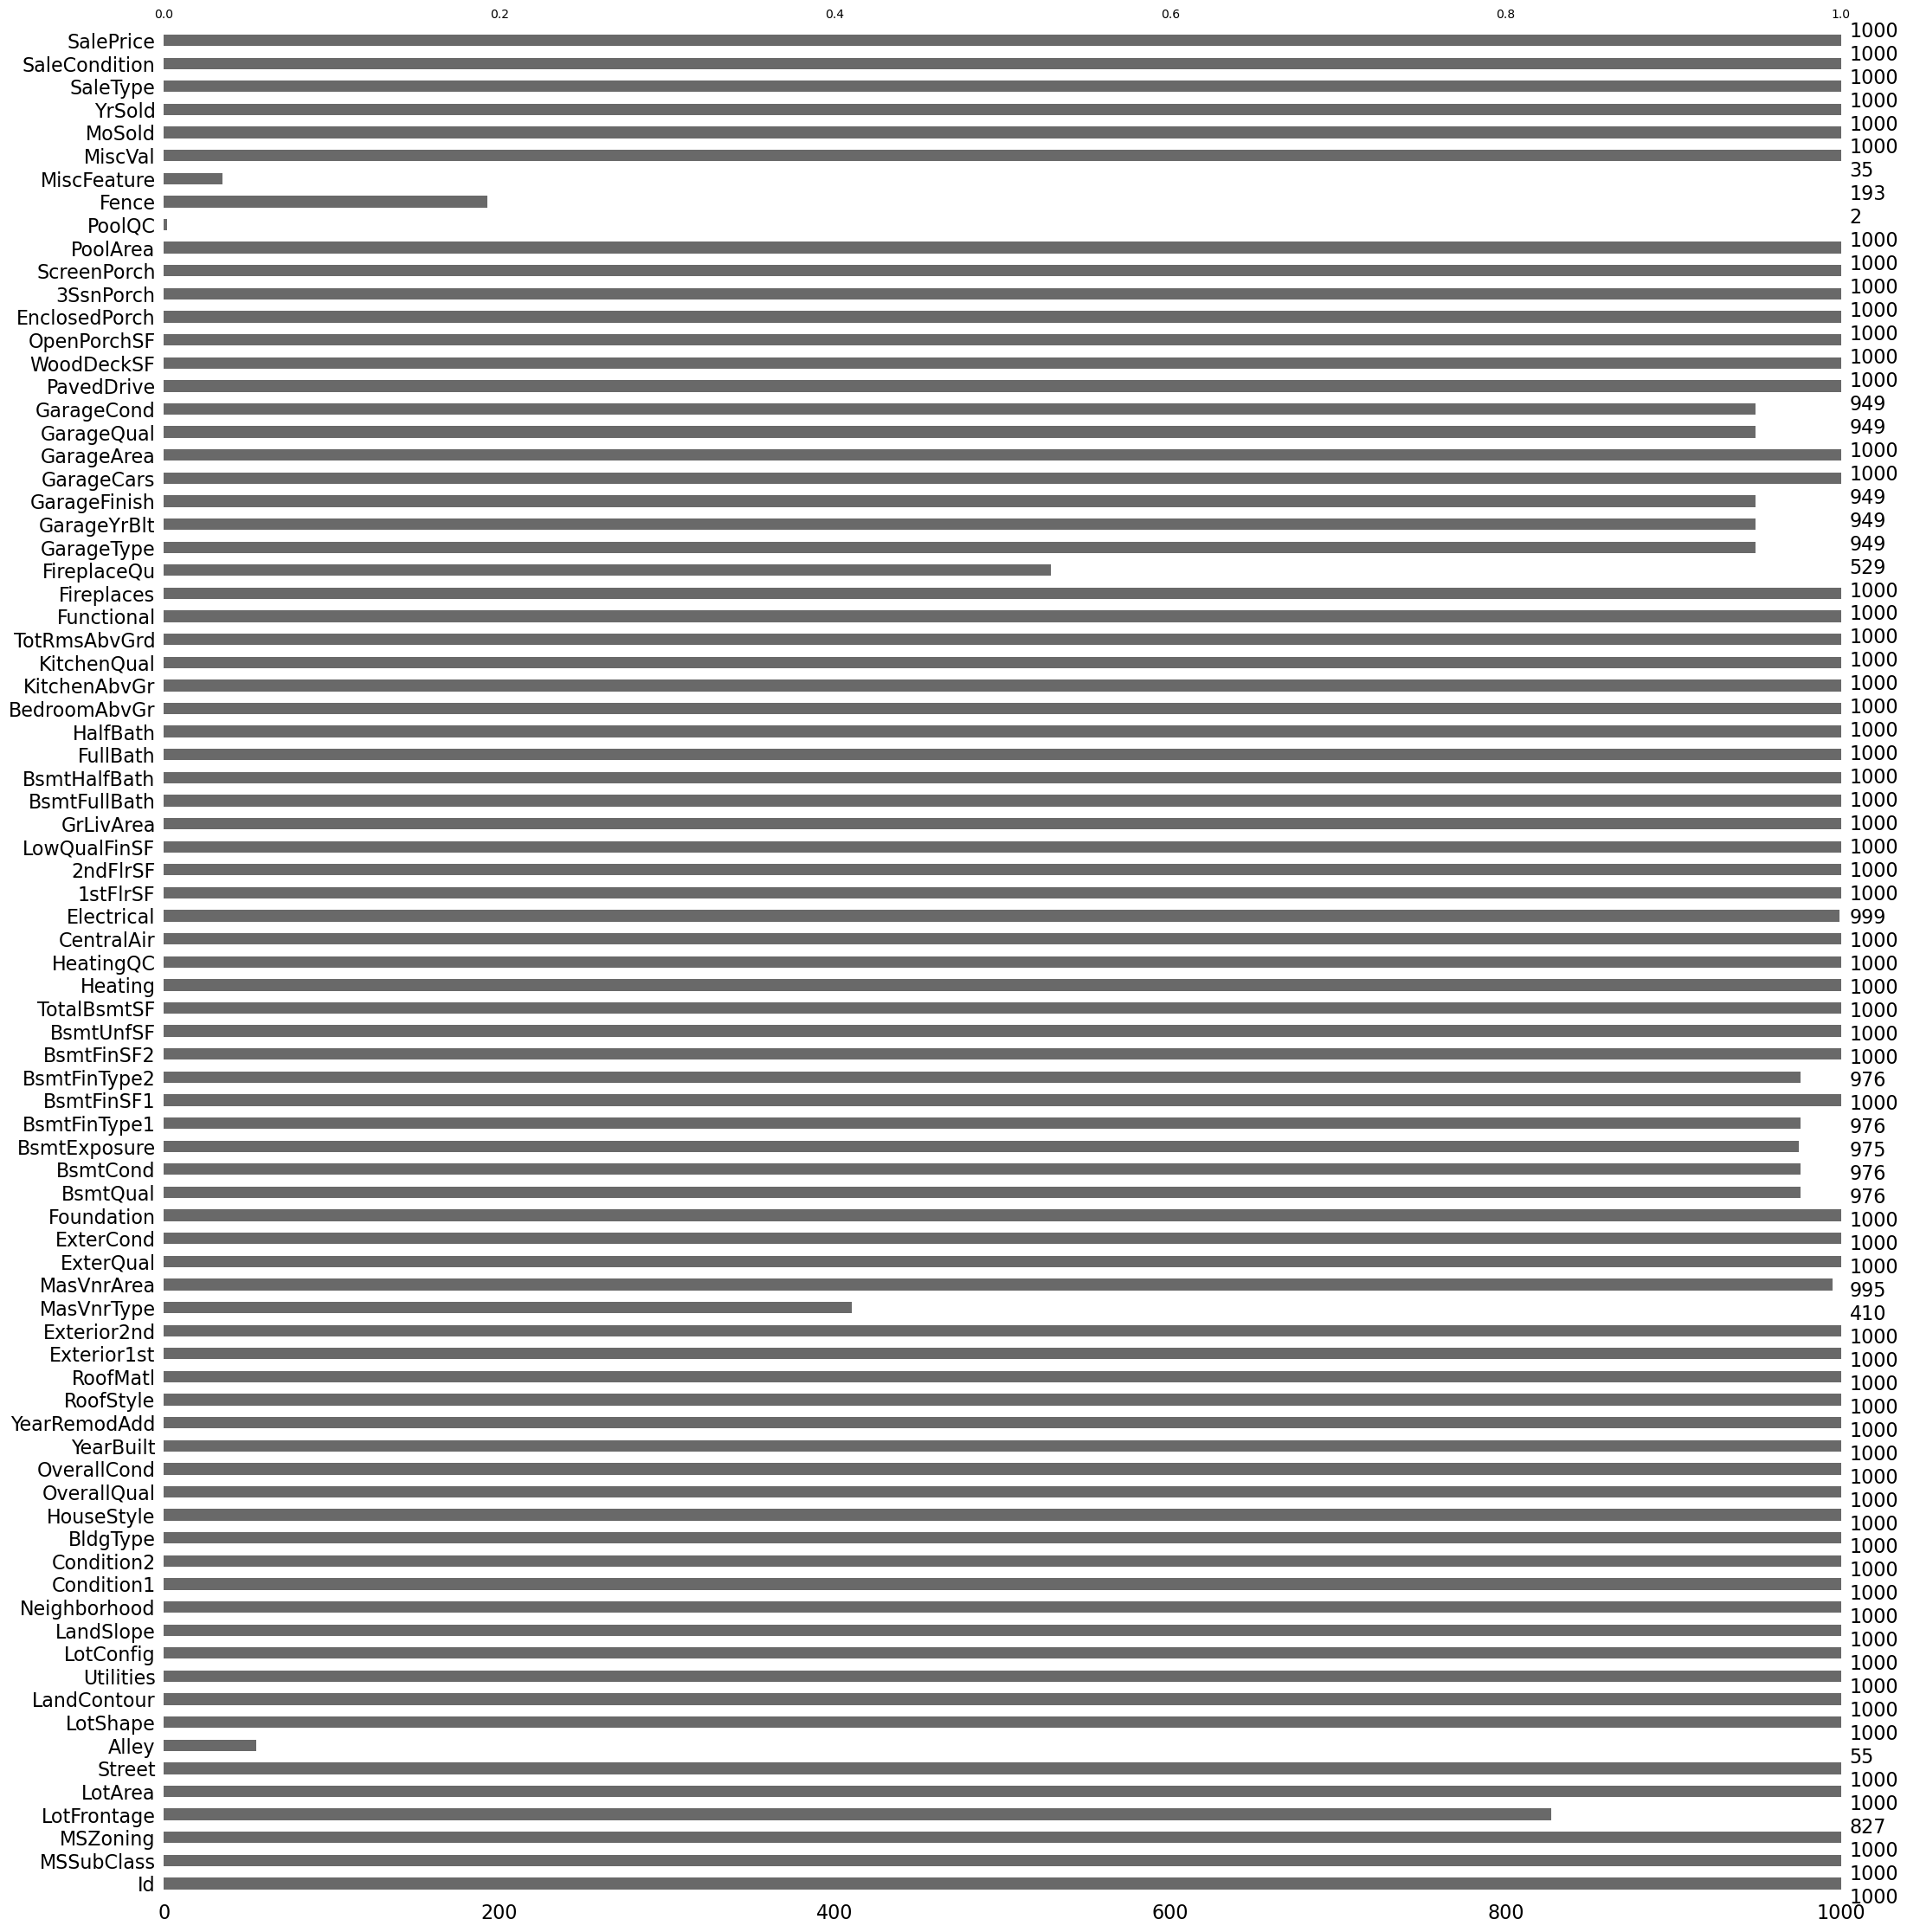

In [12]:
msno.bar(train.sample(1000))

#### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<Axes: >

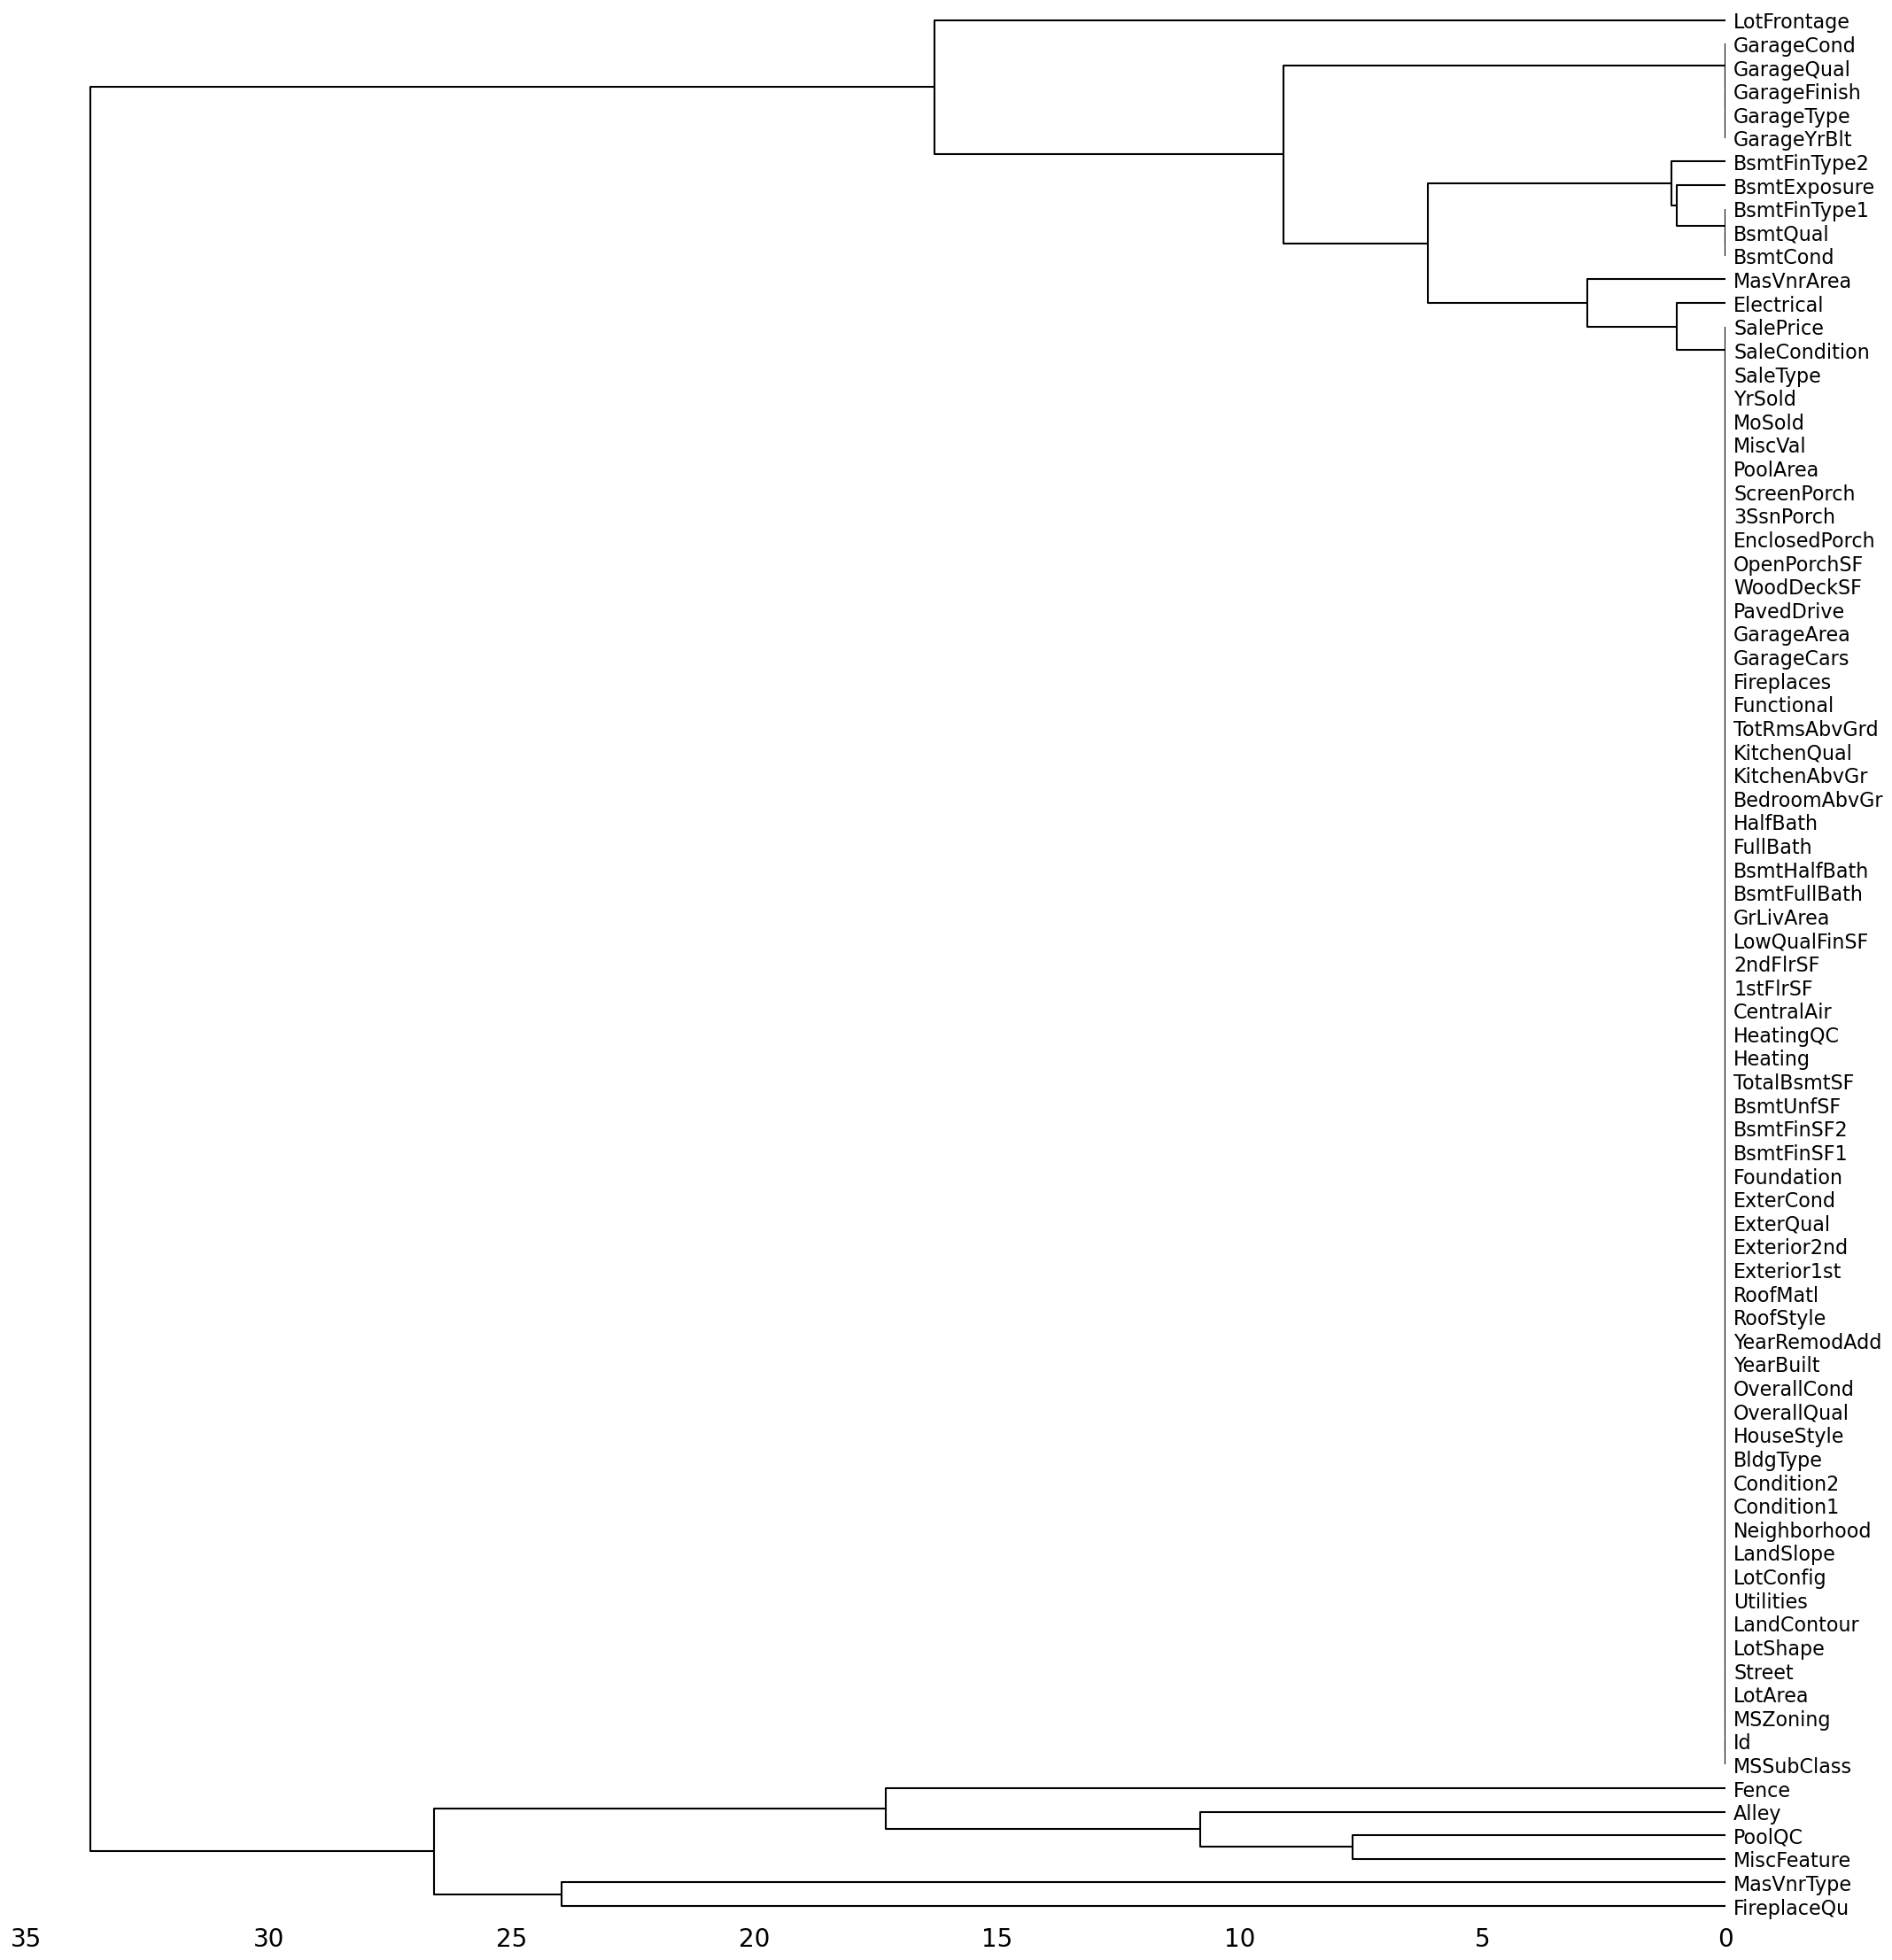

In [13]:
msno.dendrogram(train)

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity , then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

**The Challenges of The Data**

Now that we have gathered some basic information on the data, it’s a good idea to just go a little bit deeper into the challenges that the data might pose.

There are two factors mostly observed in EDA exercise which are **missing values** and **outliers**

**Estimate Skewness and Kurtosis**

In [14]:
train.skew(numeric_only=True), train.kurt(numeric_only=True)

(Id                0.000000
 MSSubClass        1.407657
 LotFrontage       2.163569
 LotArea          12.207688
 OverallQual       0.216944
 OverallCond       0.693067
 YearBuilt        -0.613461
 YearRemodAdd     -0.503562
 MasVnrArea        2.669084
 BsmtFinSF1        1.685503
 BsmtFinSF2        4.255261
 BsmtUnfSF         0.920268
 TotalBsmtSF       1.524255
 1stFlrSF          1.376757
 2ndFlrSF          0.813030
 LowQualFinSF      9.011341
 GrLivArea         1.366560
 BsmtFullBath      0.596067
 BsmtHalfBath      4.103403
 FullBath          0.036562
 HalfBath          0.675897
 BedroomAbvGr      0.211790
 KitchenAbvGr      4.488397
 TotRmsAbvGrd      0.676341
 Fireplaces        0.649565
 GarageYrBlt      -0.649415
 GarageCars       -0.342549
 GarageArea        0.179981
 WoodDeckSF        1.541376
 OpenPorchSF       2.364342
 EnclosedPorch     3.089872
 3SsnPorch        10.304342
 ScreenPorch       4.122214
 PoolArea         14.828374
 MiscVal          24.476794
 MoSold            0

<Axes: title={'center': 'Log Normal'}, xlabel='SalePrice'>

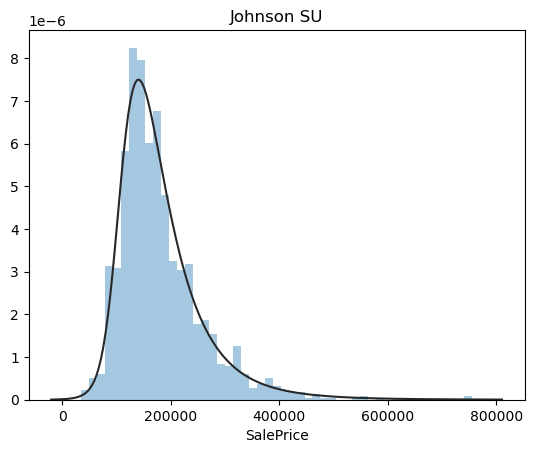

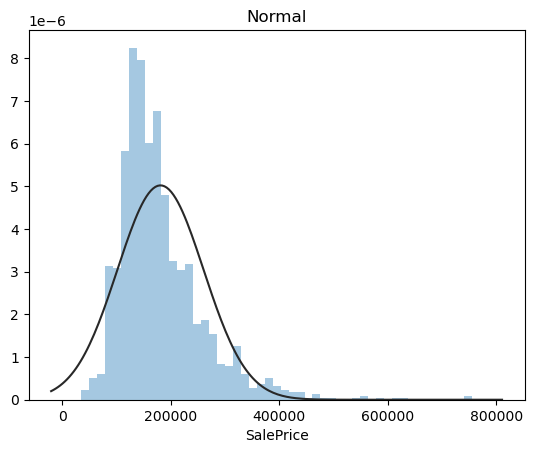

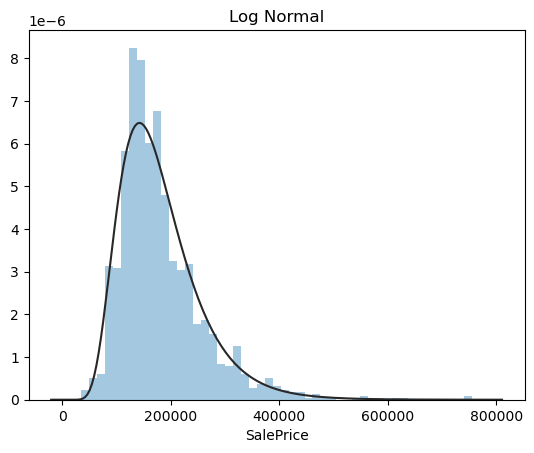

In [15]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

<Axes: xlabel='Skewness', ylabel='Density'>

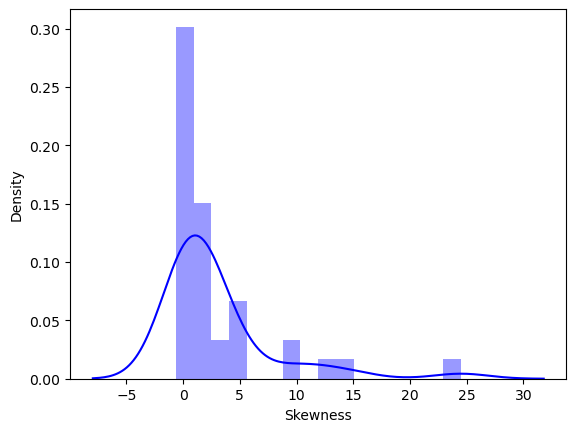

In [16]:
sns.distplot(train.skew(numeric_only=True),color='blue',axlabel ='Skewness')

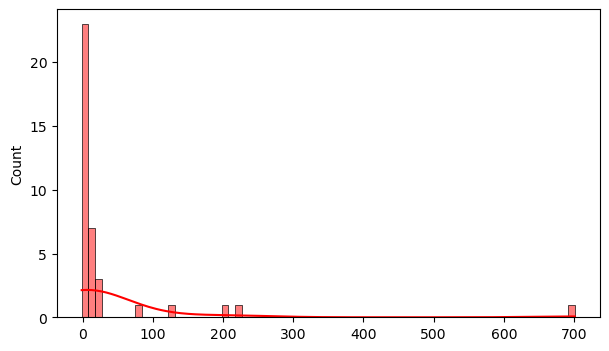

In [17]:
plt.figure(figsize = (7,4))
sns.histplot(train.kurt(numeric_only=True),color='r',label ='Kurtosis', kde = True)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

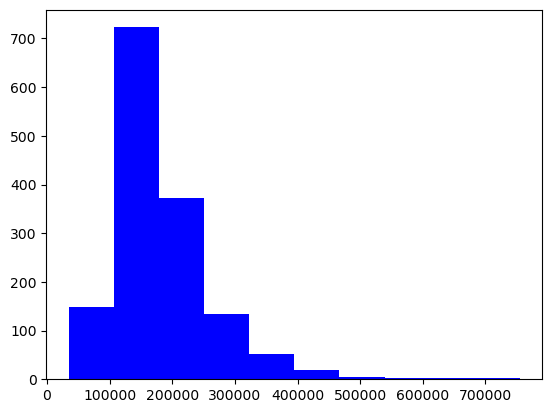

In [18]:
plt.hist(train['SalePrice'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

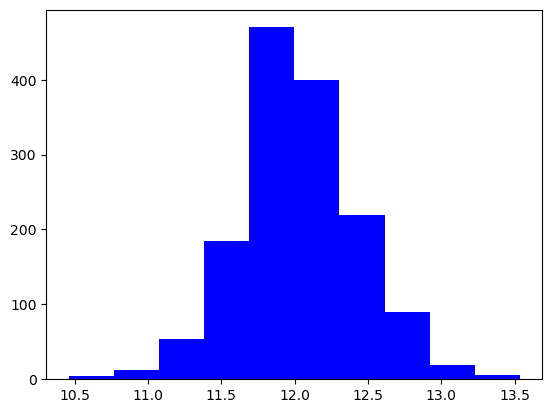

In [19]:
target = np.log(train['SalePrice'])
target.skew()
plt.hist(target,color='blue')

Finding Correlation coefficients between numeric features and SalePrice

In [20]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

To explore further we will start with the following visualisation methods to analyze the data better:

 - Correlation Heat Map
 - Zoomed Heat Map
 - Pair Plot 
 - Scatter Plot

### Correlation Heat Map

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

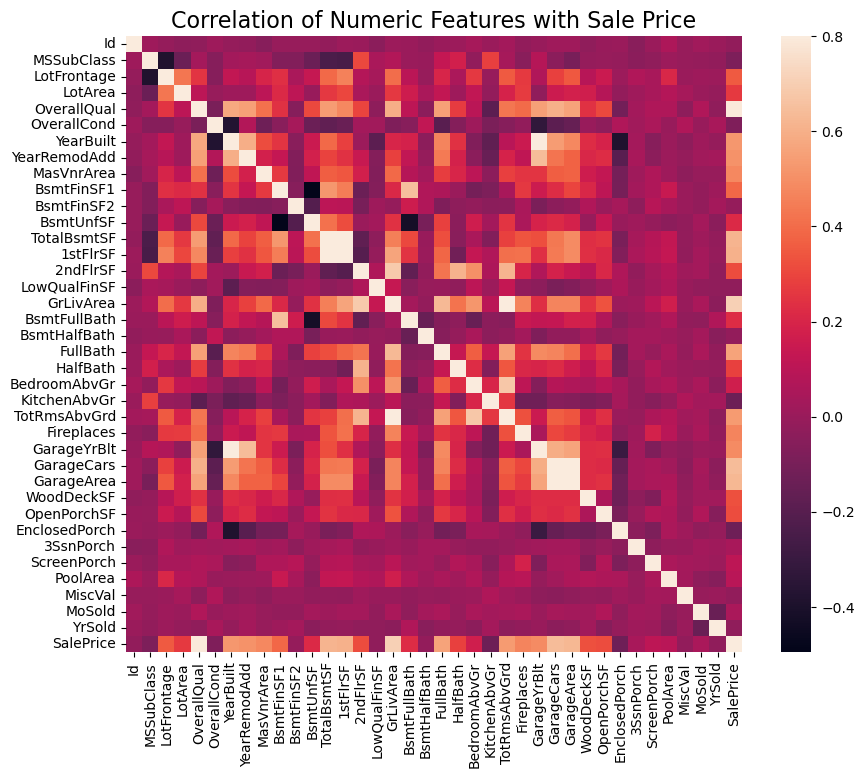

In [21]:
f , ax = plt.subplots(figsize = (10,8))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

The heatmap is the best way to get a quick overview of correlated features thanks to seaborn!

At initial glance it is observed that there are two red colored squares that get my attention. 
1. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables.
2. Second one refers to the 'GarageX' variables. 
Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

Heatmaps are great to detect this kind of multicollinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.

Another aspect I observed here is the 'SalePrice' correlations.As it is observed that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hello !' to SalePrice, however we cannot exclude the fact that rest of the features have some level of correlation to the SalePrice. To observe this correlation closer let us see it in Zoomed Heat Map 

### Zoomed HeatMap

#### SalePrice Correlation matrix

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

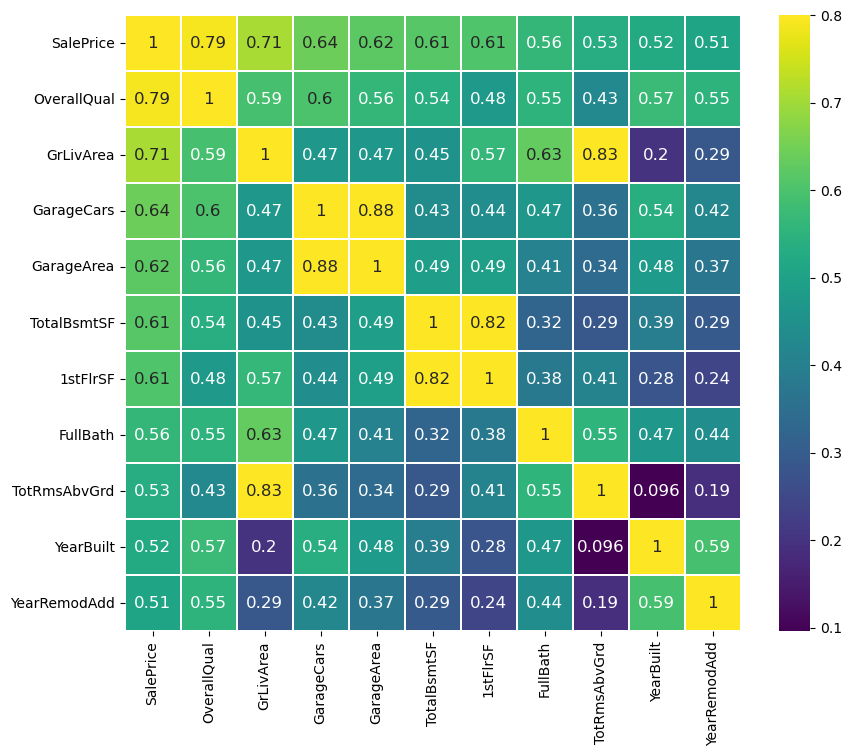

In [22]:
k= 11
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From above zoomed heatmap it is observed that GarageCars & GarageArea are closely correlated .
Similarly TotalBsmtSF and 1stFlrSF are also closely correlated.


My observations :
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are strongly correlated variables. It is because the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. So it is hard to distinguish between the two. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twins. In this case let us keep 'TotalBsmtSF'
- 'TotRmsAbvGrd' and 'GrLivArea', twins
- 'YearBuilt' it appears like is slightly correlated with 'SalePrice'. This required more analysis to arrive at a conclusion may be do some time series analysis.

### Pair Plot 

#### Pair Plot between 'SalePrice' and correlated variables 

Visualisation of 'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd' features 
with respect to SalePrice in the form of pair plot & scatter pair plot for better understanding.

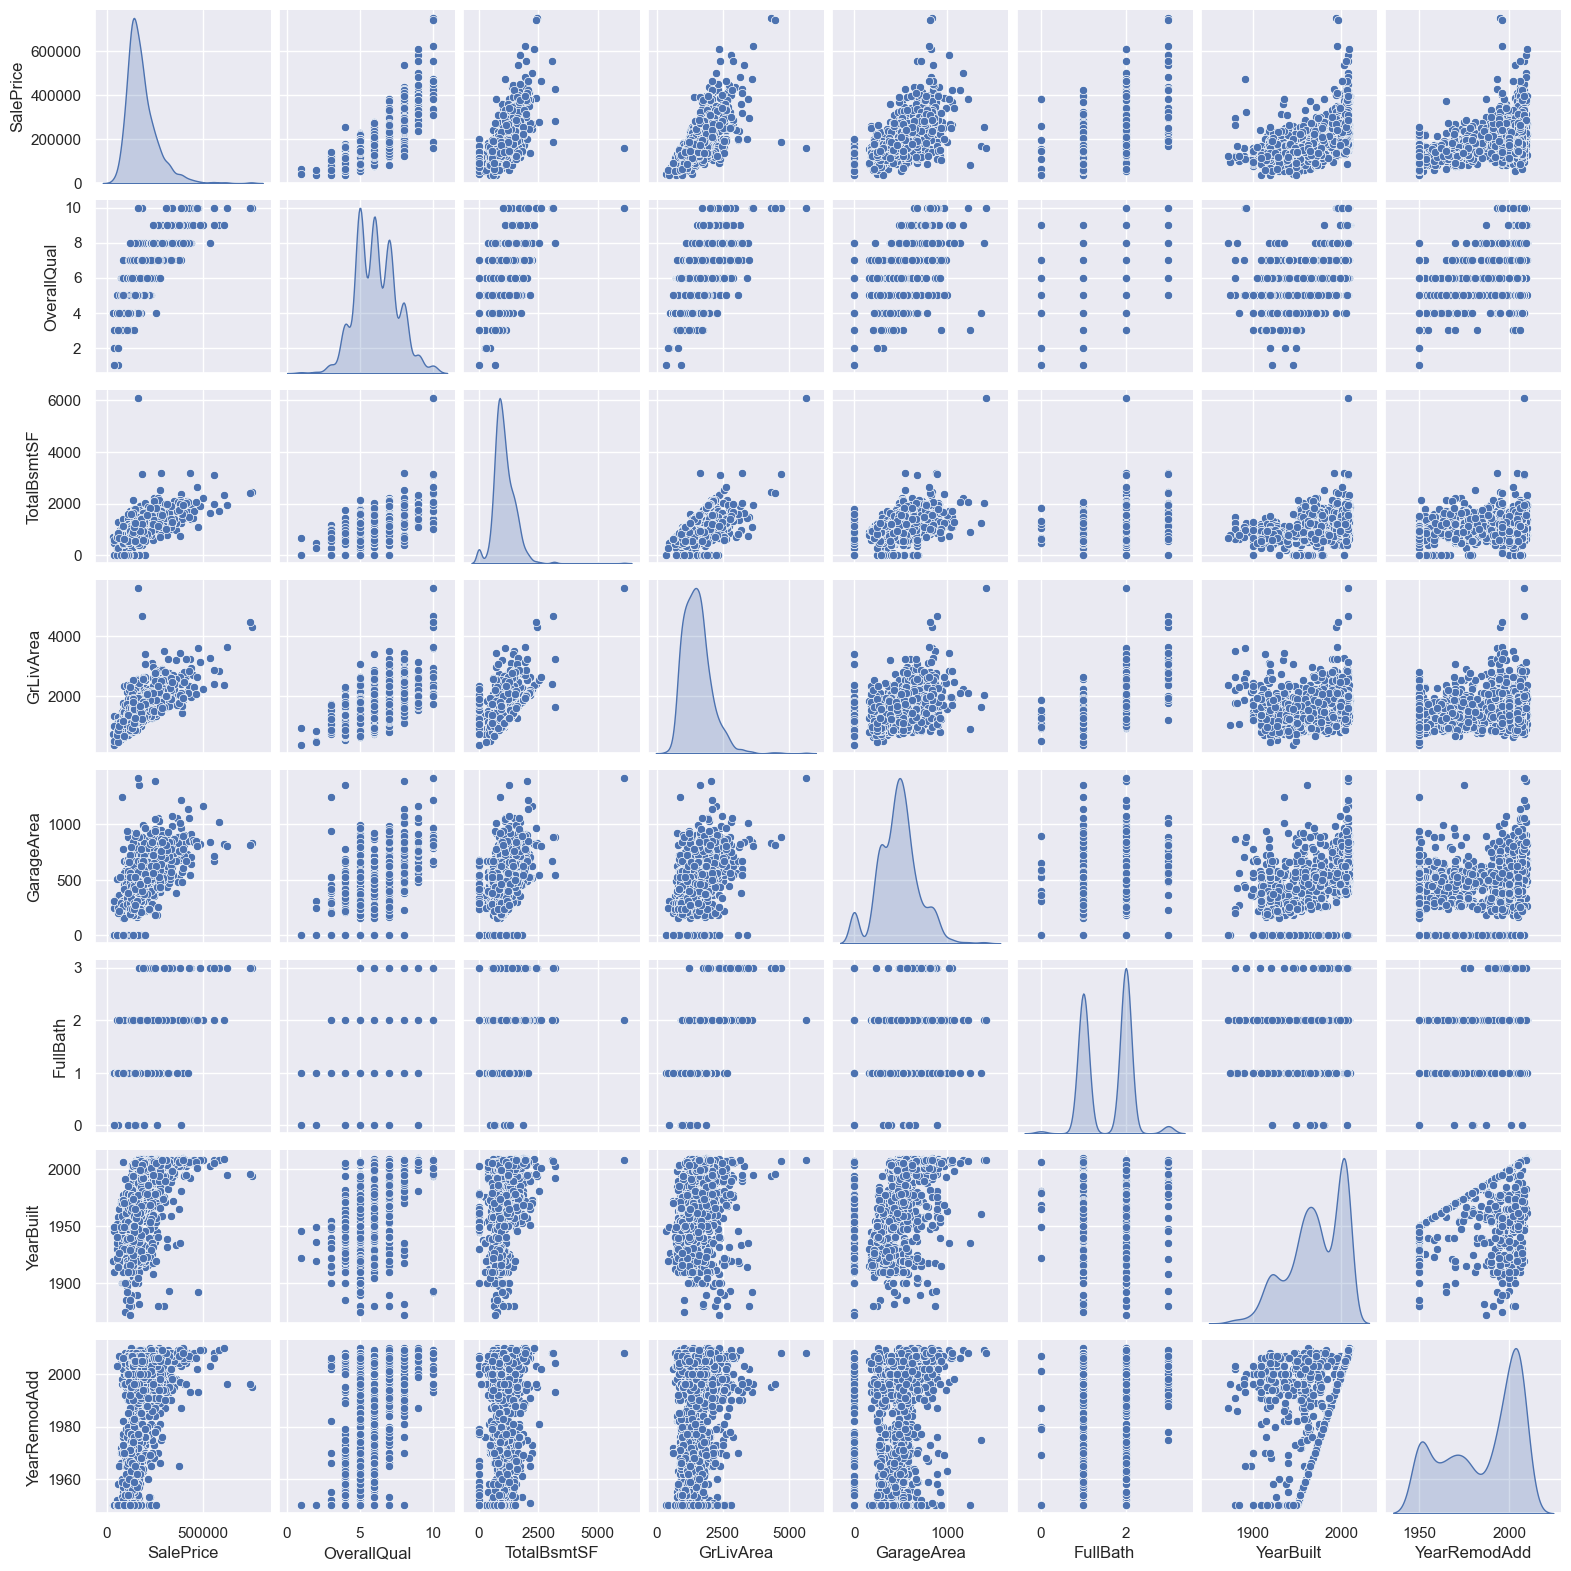

In [23]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Although we already know some of the main figures, this pair plot gives us a reasonable overview insight about the correlated features .Here are some of my analysis.

- One interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.

- One more interesting observation is between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function.We can also see this same tendency in the upper limit of the 'dots cloud' 
- Last observation is that prices are increasing faster now with respect to previous years.

### Scatter Plot 

#### Scatter plots between the most correlated variables

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

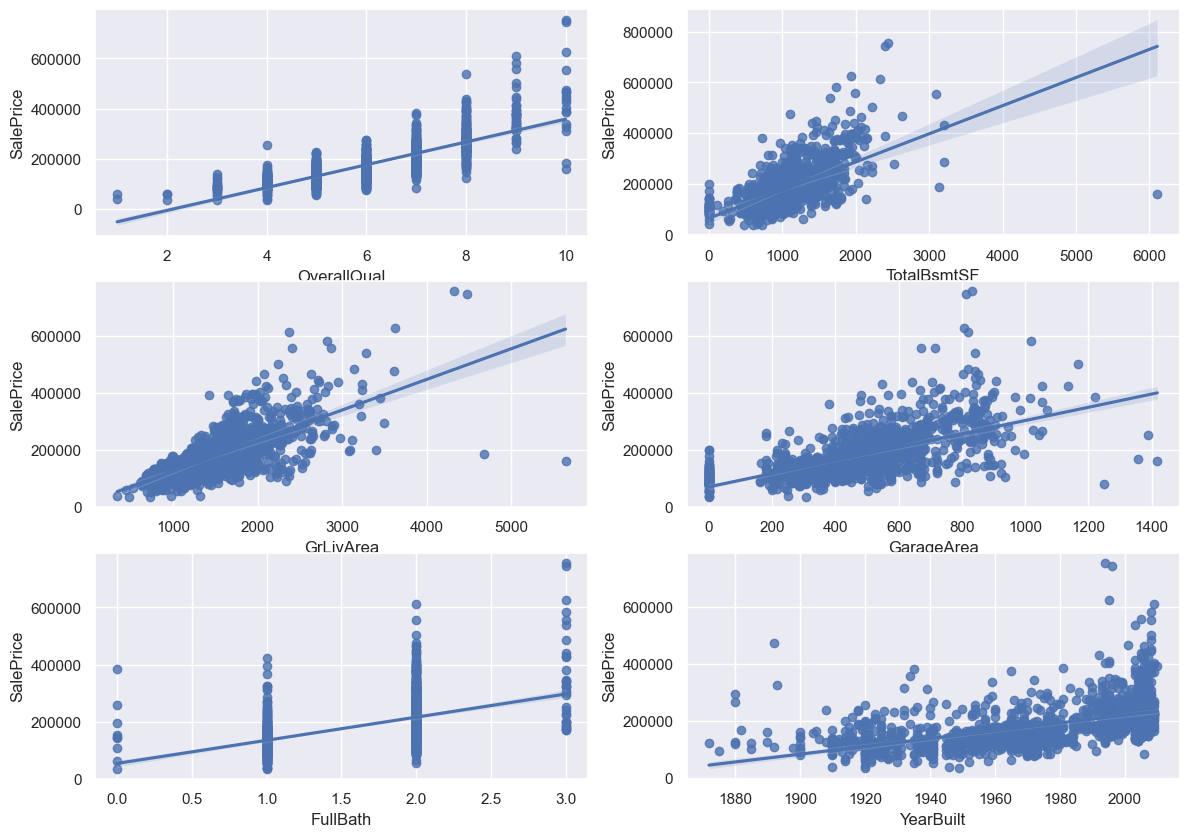

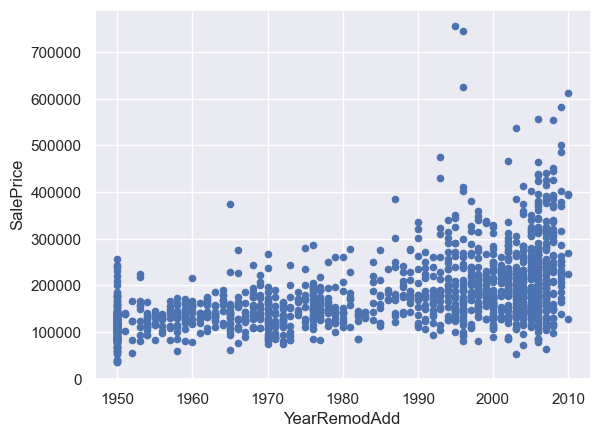

In [24]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

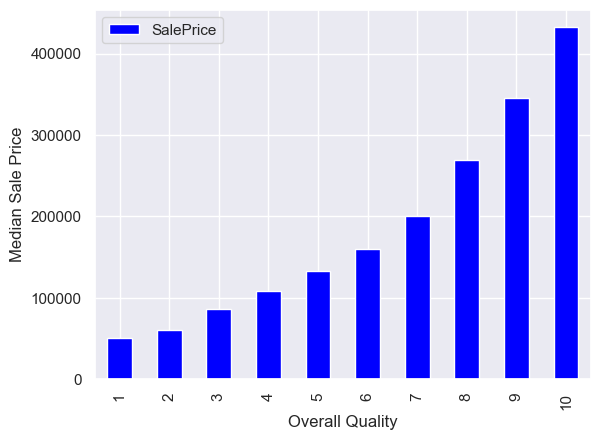

In [25]:
saleprice_overall_quality= train.pivot_table(index ='OverallQual',values = 'SalePrice', aggfunc = np.median)
saleprice_overall_quality.plot(kind = 'bar',color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

#### Box plot - OverallQual

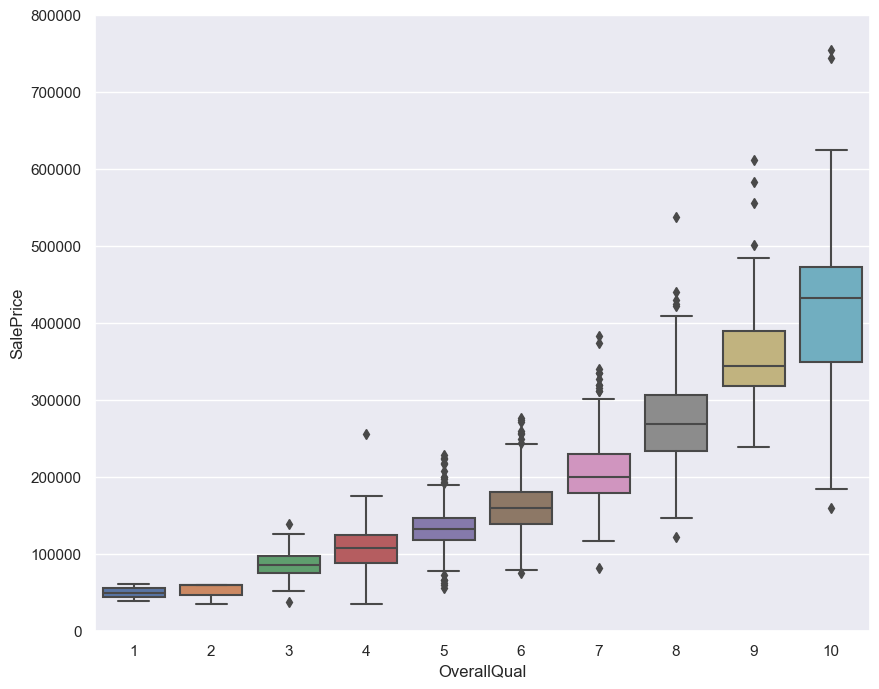

In [26]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Box plot - Neighborhood

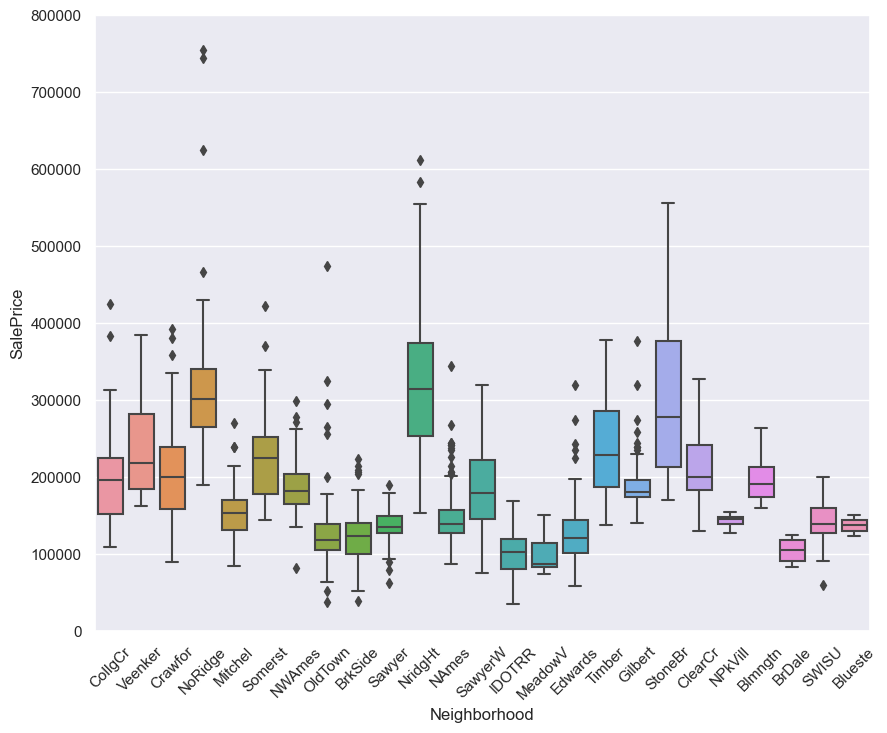

In [27]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

#### Count Plot - Neighborhood

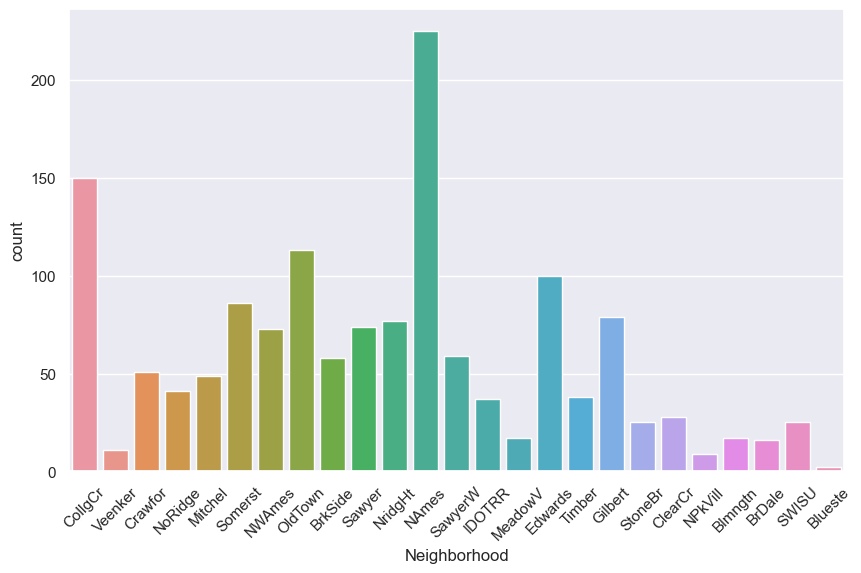

In [30]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Neighborhood', data = data)
xt = plt.xticks(rotation=45)

Based on the above observation can group those Neighborhoods with similar housing price into a same bucket for dimension-reduction.Let us see this in the preprocessing stage

With qualitative variables we can check distribution of SalePrice with respect to variable values and enumerate them. 

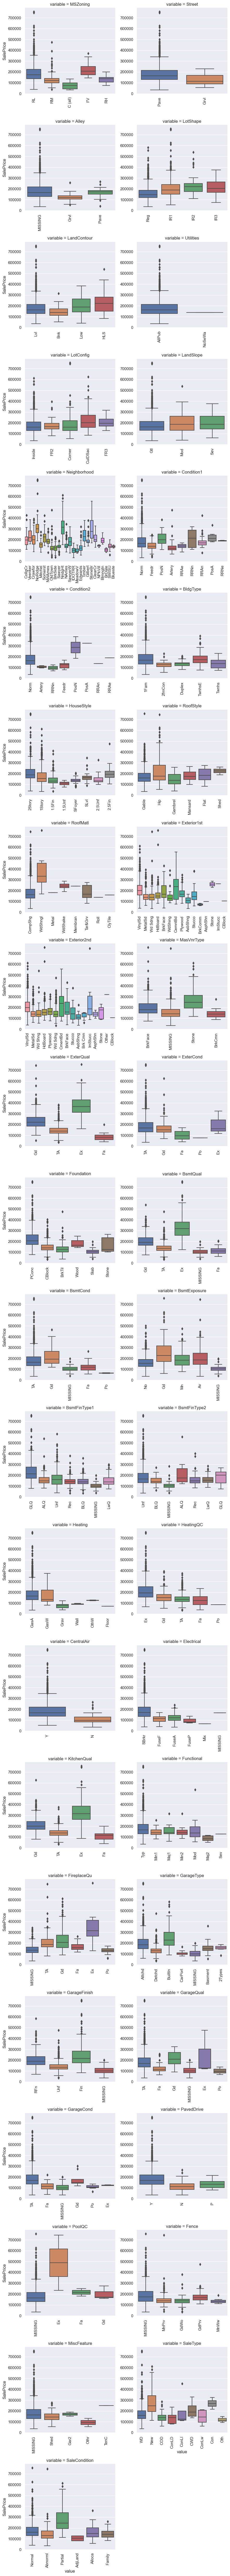

In [33]:
%matplotlib inline
for c in categorical_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=4.5)
g = g.map(boxplot, "value", "SalePrice")


#### Housing Price vs Sales

- Sale Type & Condition
- Sales Seasonality

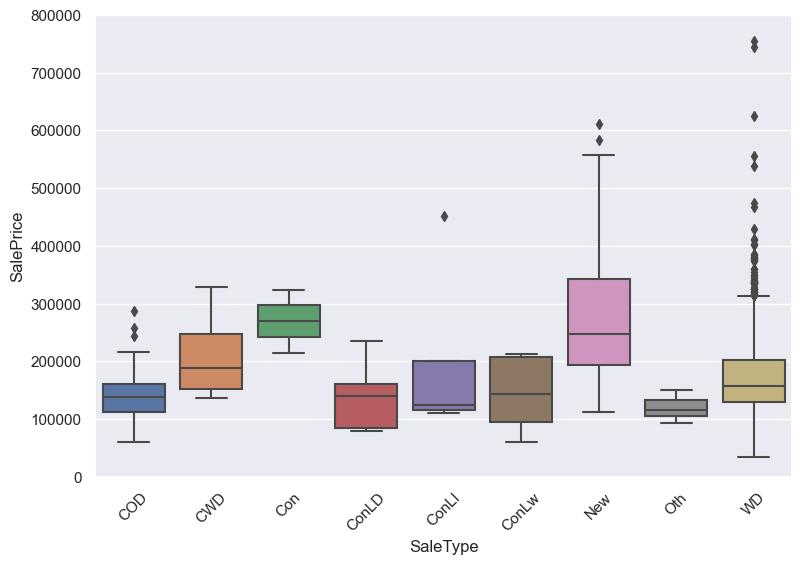

In [36]:
%matplotlib inline
var = 'SaleType'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

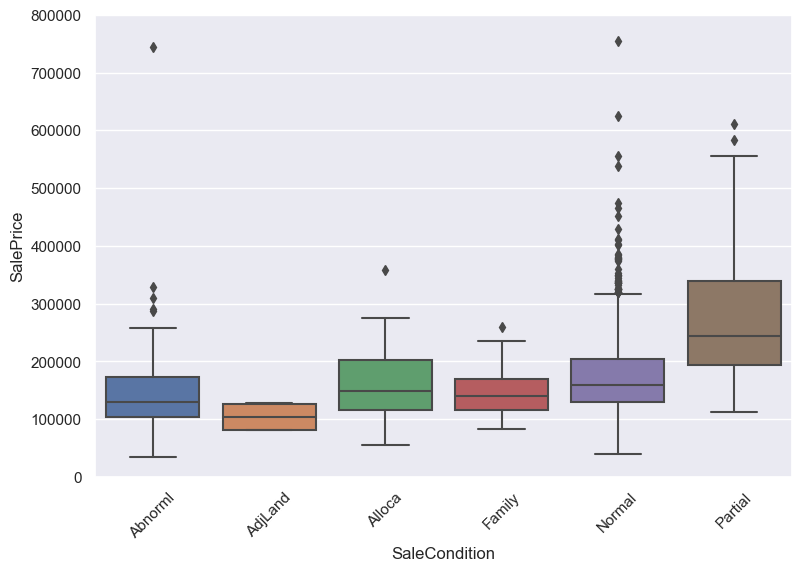

In [40]:
var = 'SaleCondition'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

#### ViolinPlot - Functional vs.SalePrice

<Axes: xlabel='Functional', ylabel='SalePrice'>

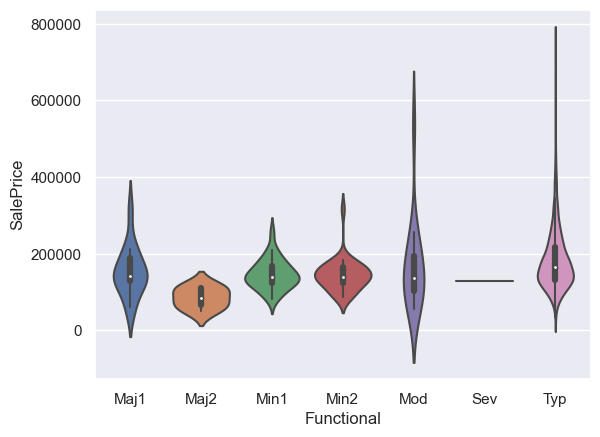

In [54]:
sns.violinplot(train,x='Functional', y='SalePrice')

#### FactorPlot - FirePlaceQC vs. SalePrice 

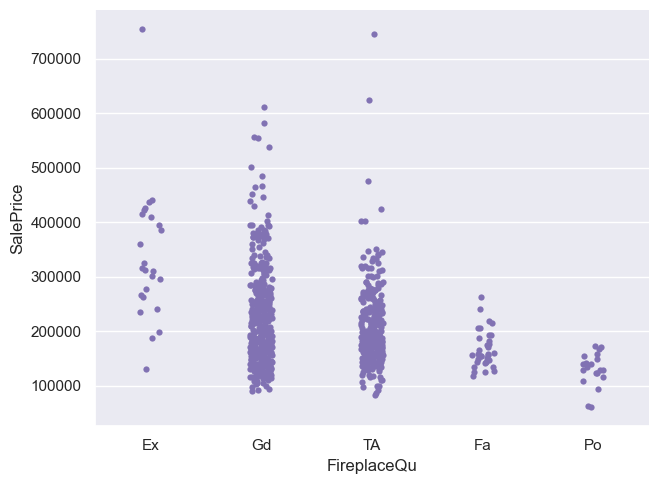

In [56]:
sns.catplot(x='FireplaceQu', y='SalePrice', data = train, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

#### Facet Grid Plot - FirePlace QC vs.SalePrice

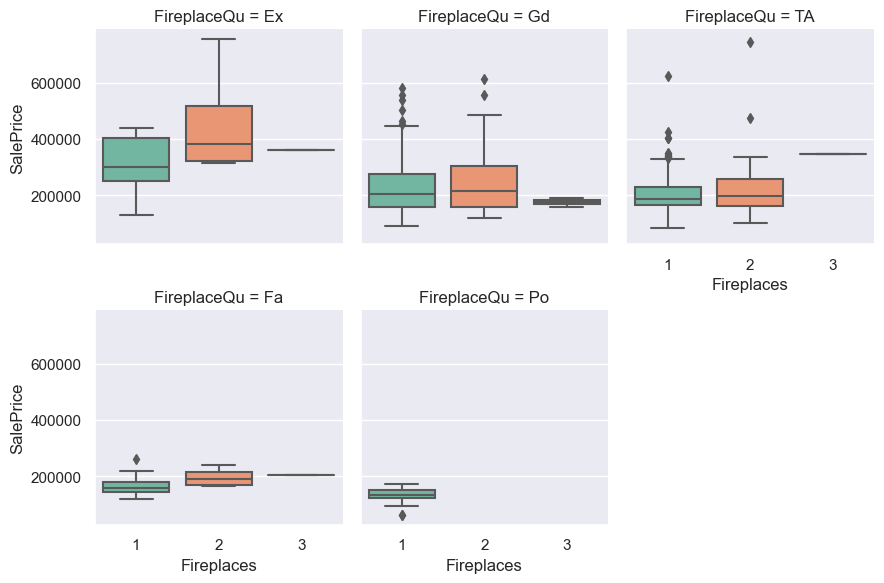

In [43]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

#### PointPlot

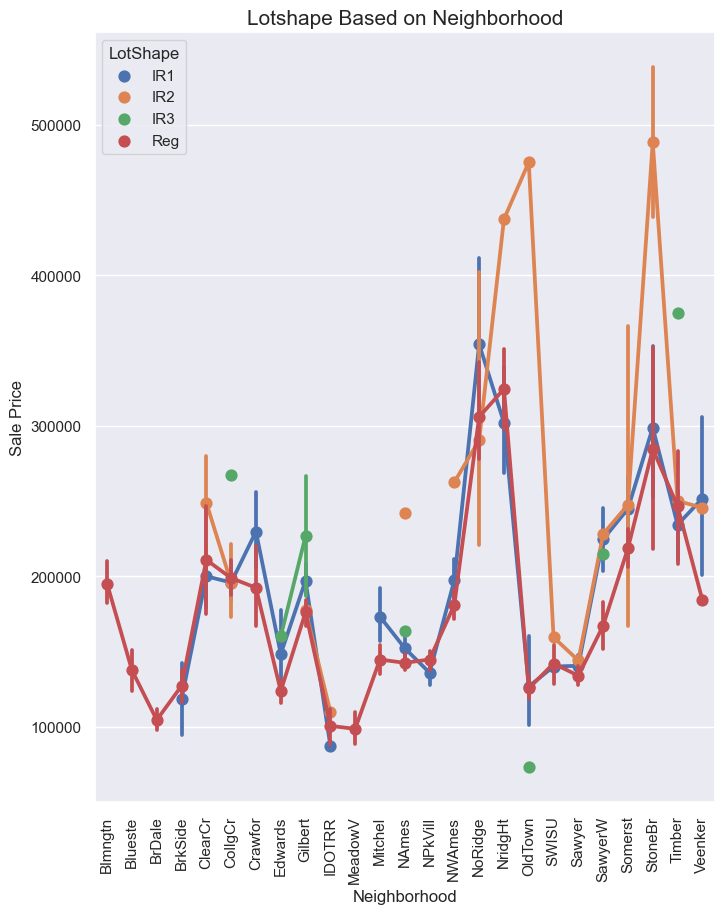

In [44]:
plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='Neighborhood', y='SalePrice', 
                   data=train, hue='LotShape')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on Neighborhood", fontsize=15)
g1.set_xlabel("Neighborhood")
g1.set_ylabel("Sale Price", fontsize=12)
plt.show()

 ### Missing Value Analysis 
 
 #### Numeric Features

In [45]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

Total Missing Count  % of Total Observations
 Numeric Feature                                              
LotFrontage                       259                 0.177397
GarageYrBlt                        81                 0.055479
MasVnrArea                          8                 0.005479
Id                                  0                 0.000000
OpenPorchSF                         0                 0.000000
KitchenAbvGr                        0                 0.000000
TotRmsAbvGrd                        0                 0.000000
Fireplaces                          0                 0.000000
GarageCars                          0                 0.000000
GarageArea                          0                 0.000000
WoodDeckSF                          0                 0.000000
EnclosedPorch                       0                 0.000000
HalfBath                            0                 0.000000
3SsnPorch                           0                 0.000000
ScreenPorch                         0                 0.000000
PoolArea                            0                 0.000000
MiscVal                             0                 0.000000
MoSold                              0                 0.000000
YrSold                              0                 0.000000
BedroomAbvGr                        0                 0.000000

#### Missing values for all numeric features in Bar chart Representation

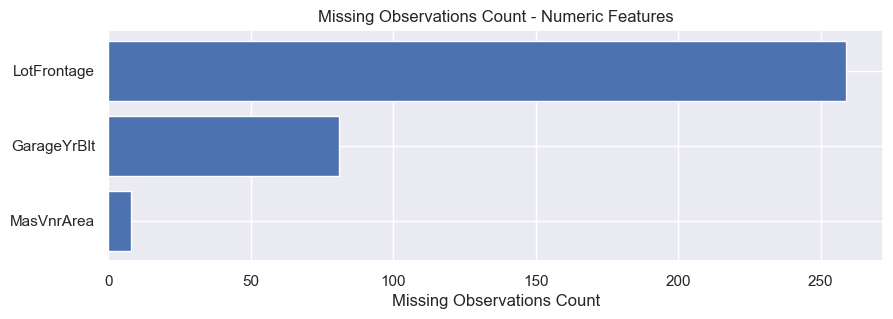

In [47]:
missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(10,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()


#### Categorical Features

In [48]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

Total Missing Count   % of Total Observations
Feature                                                    
PoolQC                       1453                  0.995205
MiscFeature                  1406                  0.963014
Alley                        1369                  0.937671
Fence                        1179                  0.807534
MasVnrType                    872                  0.597260
FireplaceQu                   690                  0.472603
GarageType                     81                  0.055479
GarageCond                     81                  0.055479
GarageQual                     81                  0.055479
GarageFinish                   81                  0.055479
BsmtFinType2                   38                  0.026027
BsmtExposure                   38                  0.026027
BsmtFinType1                   37                  0.025342
BsmtQual                       37                  0.025342
BsmtCond                       37                  0.025342
Electrical                      1                  0.000685
KitchenQual                     0                  0.000000
CentralAir                      0                  0.000000
Functional                      0                  0.000000
HeatingQC                       0                  0.000000

#### Missing values for  Categorical features in Bar chart Representation

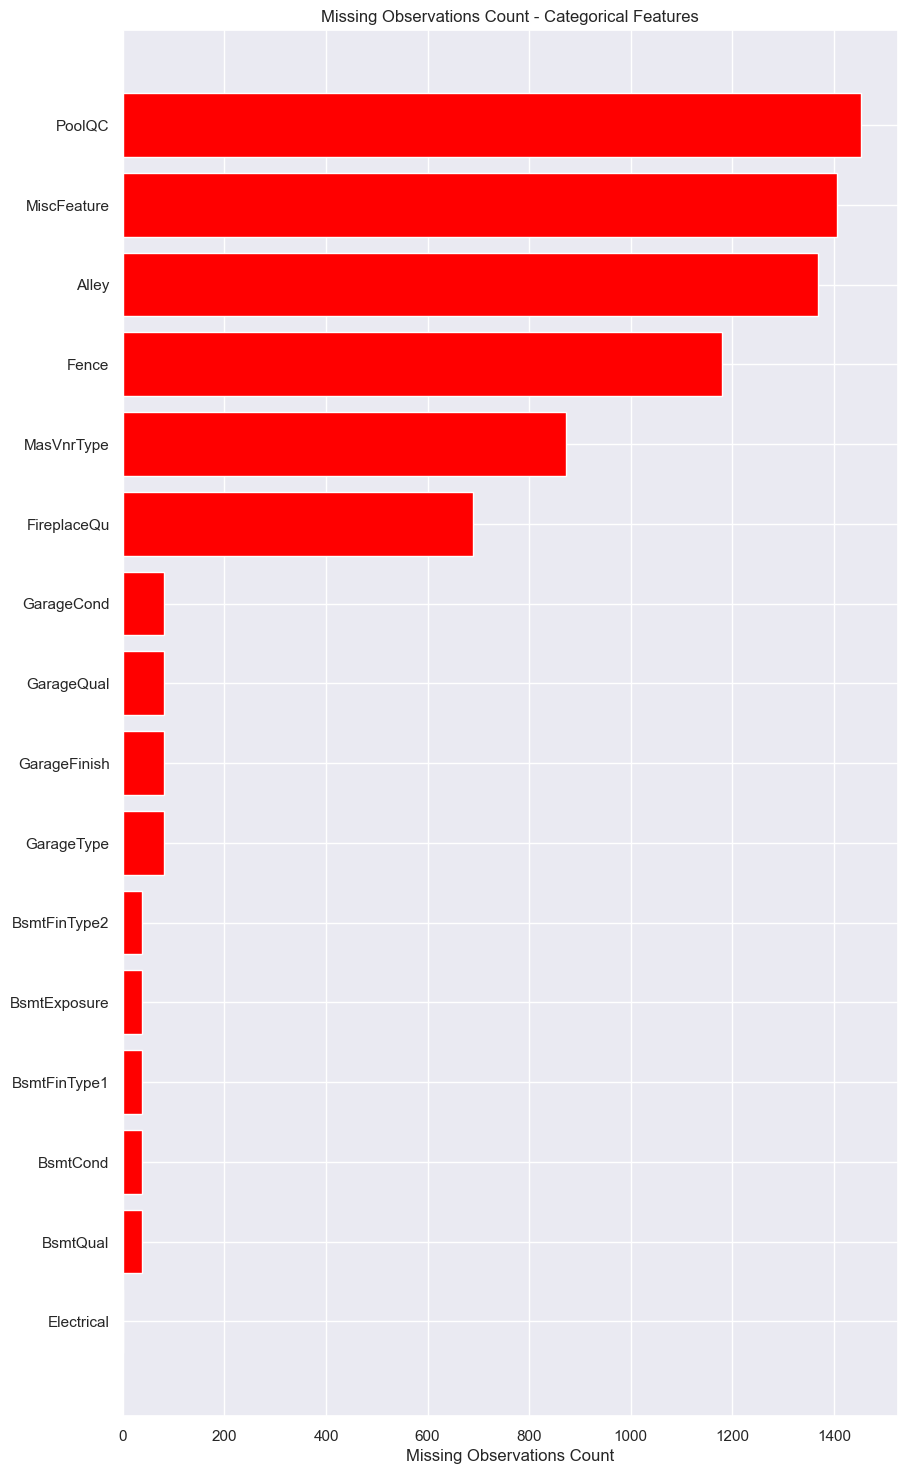

In [50]:
missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

### Categorical Feature Exploration

In [51]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))
 
for column_name in test.columns:
    if test[column_name].dtypes == 'object':
        test[column_name] = test[column_name].fillna(test[column_name].mode().iloc[0])
        unique_category = len(test[column_name].unique())
        print("Features in test set '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name, unique_category=unique_category))

Features in test set 'MSZoning' has '5' unique categories
Features in test set 'Street' has '2' unique categories
Features in test set 'Alley' has '2' unique categories
Features in test set 'LotShape' has '4' unique categories
Features in test set 'LandContour' has '4' unique categories
Features in test set 'Utilities' has '1' unique categories
Features in test set 'LotConfig' has '5' unique categories
Features in test set 'LandSlope' has '3' unique categories
Features in test set 'Neighborhood' has '25' unique categories
Features in test set 'Condition1' has '9' unique categories
Features in test set 'Condition2' has '5' unique categories
Features in test set 'BldgType' has '5' unique categories
Features in test set 'HouseStyle' has '7' unique categories
Features in test set 'RoofStyle' has '6' unique categories
Features in test set 'RoofMatl' has '4' unique categories
Features in test set 'Exterior1st' has '13' unique categories
Features in test set 'Exterior2nd' has '15' unique cate